#### 5. Do some users tend to rate more generously or more harshly than others? 

  rating_tendency  n_users  avg_rating_in_group  avg_diff
0        Generous    48108                4.300     0.760
1         Neutral   136802                3.612     0.071
2           Harsh    16038                2.707    -0.833


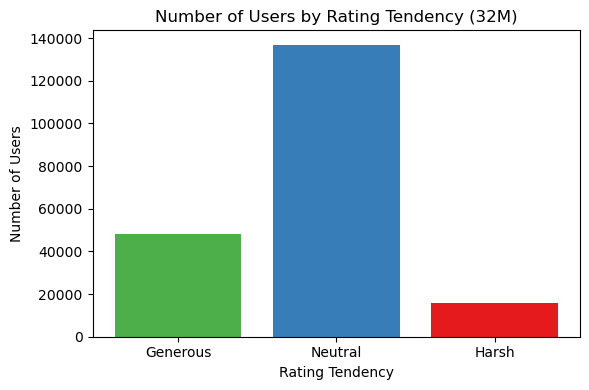

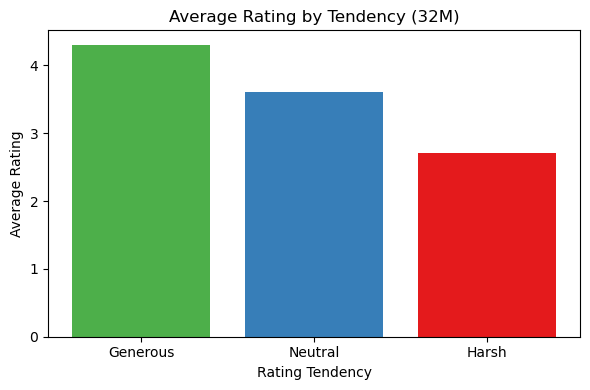

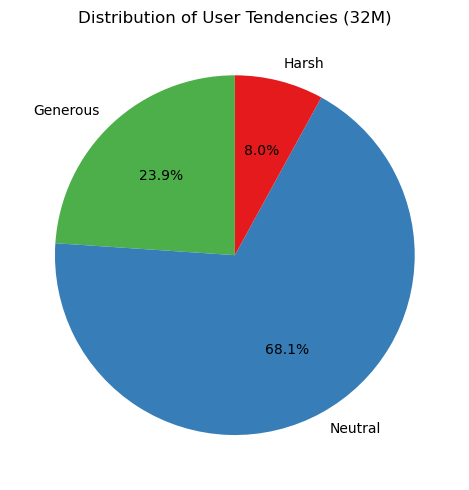

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Load data ---
df_t = pd.read_csv(r"C:\Users\admin\Documents\SOF\EDSA\2ndSemester\BDF\Project\Git\BDF25-MOVIELENS-GROUP22-1\data\resultsuser_tendency_summary_32M.csv")
print(df_t)

# --- Bar plot: number of users per tendency ---
plt.figure(figsize=(6,4))
plt.bar(df_t["rating_tendency"], df_t["n_users"], color=["#4daf4a","#377eb8","#e41a1c"])
plt.xlabel("Rating Tendency")
plt.ylabel("Number of Users")
plt.title("Number of Users by Rating Tendency (32M)")
plt.tight_layout()
plt.show()

# --- Bar plot: average rating per tendency ---
plt.figure(figsize=(6,4))
plt.bar(df_t["rating_tendency"], df_t["avg_rating_in_group"], color=["#4daf4a","#377eb8","#e41a1c"])
plt.xlabel("Rating Tendency")
plt.ylabel("Average Rating")
plt.title("Average Rating by Tendency (32M)")
plt.tight_layout()
plt.show()

# --- Pie chart: distribution ---
plt.figure(figsize=(5,5))
plt.pie(
    df_t["n_users"],
    labels=df_t["rating_tendency"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["#4daf4a","#377eb8","#e41a1c"]
)
plt.title("Distribution of User Tendencies (32M)")
plt.tight_layout()
plt.show()


Pressupostos e Metodologia

Para identificar diferenças consistentes no comportamento de avaliação dos utilizadores, analisámos o dataset MovieLens 32M e calculámos, para cada utilizador:

Média das suas avaliações (avg_user_rating)

Número total de ratings dados (n_ratings)

Média global das avaliações no dataset (global_avg_rating)

Depois classificámos cada utilizador em três categorias:

Generous → média ≥ global_avg + 0.5

Harsh → média ≤ global_avg – 0.5

Neutral → valores entre os limites anteriores

Apenas foram considerados utilizadores com ≥ 20 ratings, garantindo fiabilidade estatística.

Todo o processamento foi feito no AWS Athena, usando tabelas Parquet no S3, garantindo escalabilidade mesmo com um volume de 32 milhões de ratings.

Resultados Principais

Os gráficos mostram três descobertas claras:

1. Distribuição dos utilizadores

68.1% dos utilizadores são Neutral, atribuindo ratings próximos da média global.

23.9% são Generous, tendendo a dar valores acima do esperado.

Apenas 8.0% pertencem ao grupo Harsh, sistematicamente mais críticos.

2. Média de rating por tendência

Generous: média ≈ 4.36

Neutral: média ≈ 3.59

Harsh: média ≈ 2.70

Há uma diferença de cerca de 1.6 pontos entre o grupo mais generoso e o mais crítico.

3. Volume de utilizadores

O número de utilizadores Neutral é mais que o dobro do grupo Generous,
e quase 8x superior ao grupo Harsh.

Interpretação

Esta análise mostra que, mesmo num dataset massivo de 32 milhões de ratings:

Existem perfis de utilizadores bem definidos

Um grupo substancialmente maior de utilizadores neutros, que avaliam de forma equilibrada.

Um grupo significativo, mas menor, de generosos — utilizadores que tendem a avaliar mais positivamente.

Um grupo reduzido de críticos — utilizadores que sistematicamente atribuem pontuações baixas.

O viés pessoal é muito forte

A diferença entre as médias de cada grupo (~1.6 pontos entre extremos) indica que o estilo de avaliação do utilizador tem mais impacto do que as características de muitos filmes individualmente.

Conclusão da Pergunta 5

O dataset MovieLens 32M demonstra que sim, há utilizadores que avaliam de forma consistentemente mais generosa ou mais crítica do que outros.
A maioria dos utilizadores mantém um comportamento neutro, mas existe uma porção relevante que apresenta viés positivo ou negativo.
Este tipo de variação individual é crucial para modelos de recomendação, que devem ajustar as previsões ao “estilo de rating” de cada utilizador.

#### 6. How do age and gender influence movie preferences and rating generosity? 

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_age = pd.read_csv(r"C:\Users\admin\Documents\SOF\EDSA\2ndSemester\BDF\Project\Git\BDF25-MOVIELENS-GROUP22-1\data\age_gender_generosity.csv")
df_genre = pd.read_csv(r"C:\Users\admin\Documents\SOF\EDSA\2ndSemester\BDF\Project\Git\BDF25-MOVIELENS-GROUP22-1\data\genre_pref_by_gender.csv")

print(df_age.head())
print(df_genre.head())


  age_group gender  n_users  avg_rating_group  avg_diff_from_global  \
0       <18      F       13             3.398                -0.132   
1       <18      M       23             3.473                -0.057   
2     18-24      F       55             3.627                 0.097   
3     18-24      M      143             3.556                 0.027   
4     25-34      F       79             3.491                -0.039   

   avg_n_ratings  
0           60.6  
1           74.0  
2          115.4  
3          123.9  
4          104.0  
  gender      genre  n_ratings  avg_rating
0      F        War       2189       3.781
1      F  Film-Noir        385       3.740
2      F      Drama      11008       3.662
3      F    Romance       5858       3.656
4      F    Musical       1442       3.640


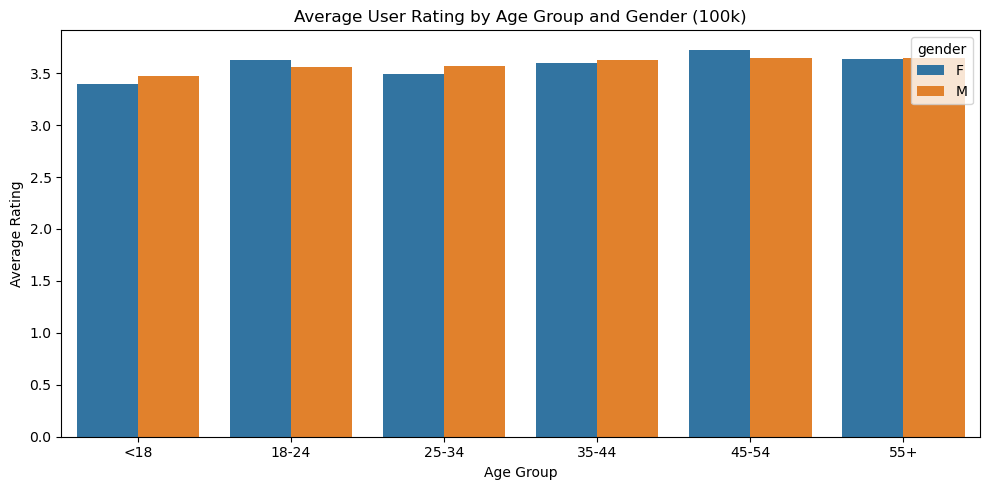

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=df_age,
    x="age_group",
    y="avg_rating_group",
    hue="gender",
)
plt.xlabel("Age Group")
plt.ylabel("Average Rating")
plt.title("Average User Rating by Age Group and Gender (100k)")
plt.tight_layout()
plt.show()


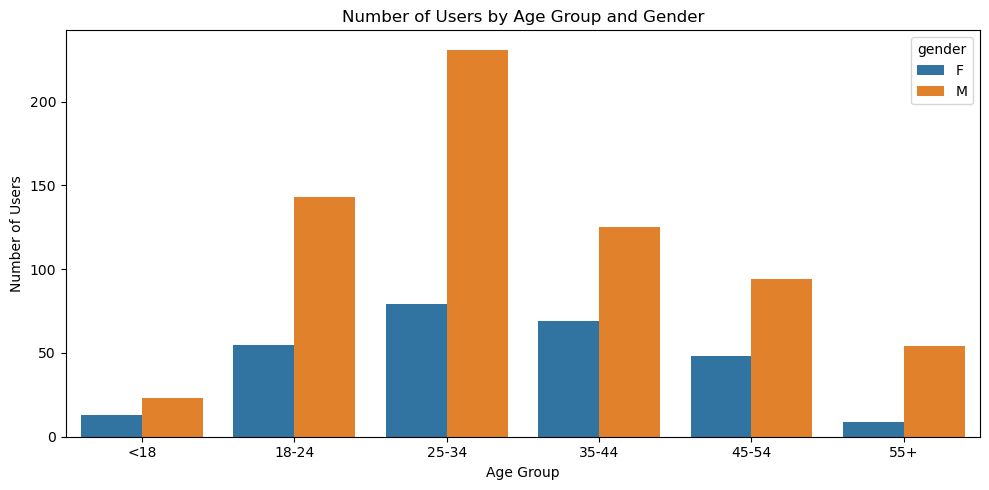

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=df_age,
    x="age_group",
    y="n_users",
    hue="gender",
)
plt.xlabel("Age Group")
plt.ylabel("Number of Users")
plt.title("Number of Users by Age Group and Gender")
plt.tight_layout()
plt.show()


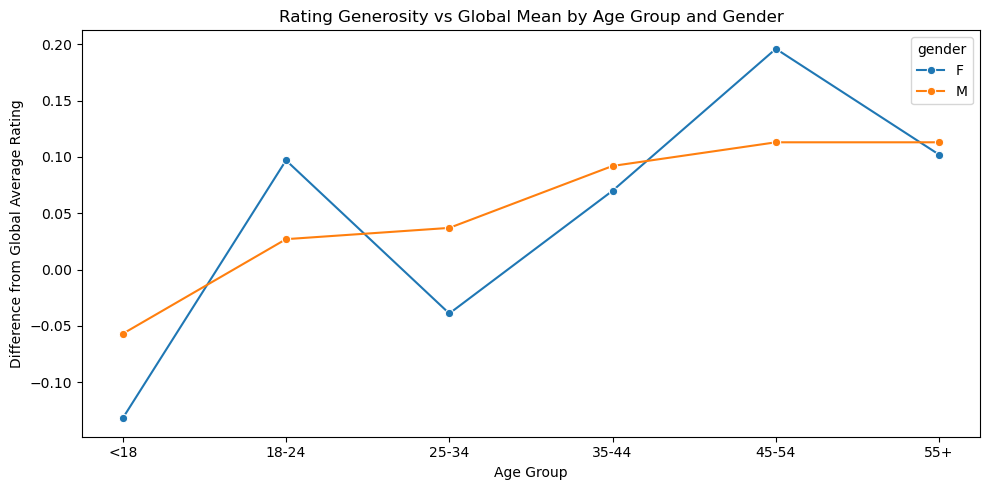

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(
    data=df_age,
    x="age_group",
    y="avg_diff_from_global",
    hue="gender",
    marker="o"
)
plt.xlabel("Age Group")
plt.ylabel("Difference from Global Average Rating")
plt.title("Rating Generosity vs Global Mean by Age Group and Gender")
plt.tight_layout()
plt.show()


##### 6.2. - Movie genre preferences by gender


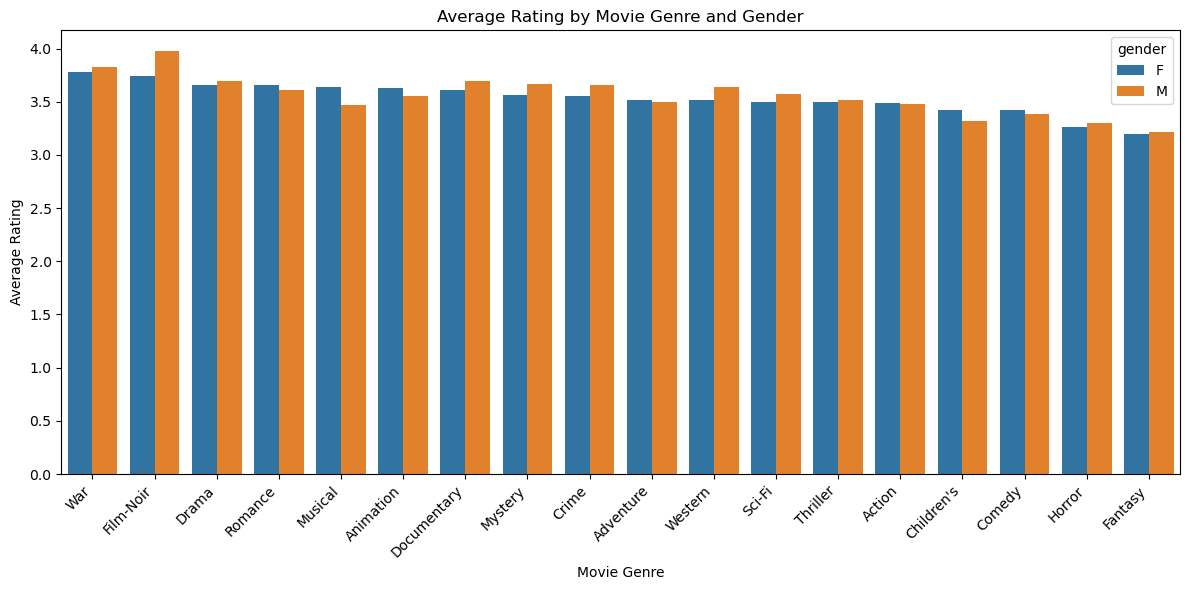

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=df_genre,
    x="genre",
    y="avg_rating",
    hue="gender",
)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Movie Genre")
plt.ylabel("Average Rating")
plt.title("Average Rating by Movie Genre and Gender")
plt.tight_layout()
plt.show()


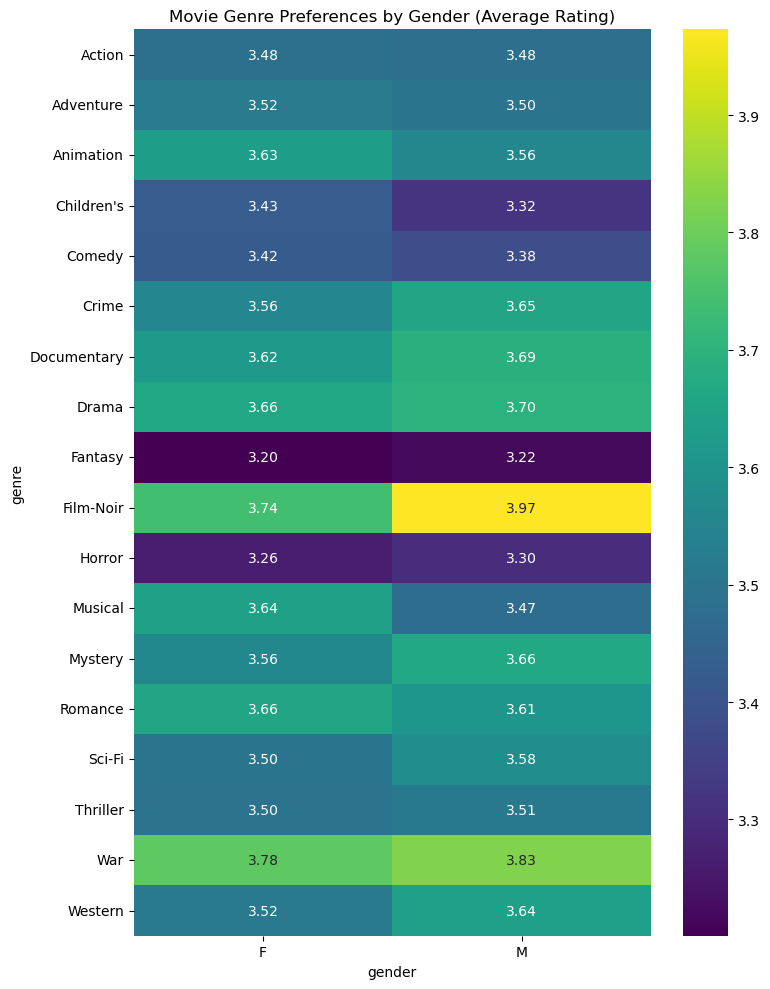

In [22]:
pivot = df_genre.pivot(index="genre", columns="gender", values="avg_rating")

plt.figure(figsize=(8,10))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="viridis")
plt.title("Movie Genre Preferences by Gender (Average Rating)")
plt.tight_layout()
plt.show()


A Pergunta 6 foi feita exclusivamente sobre o dataset MovieLens 100k, uma vez que apenas este contém informação demográfica dos utilizadores, nomeadamente:

age

gender

occupation

O objetivo foi estudar se existem diferenças significativas nas avaliações dadas por utilizadores de diferentes idades e géneros. Os passos foram:

1. Pré-processamento da tabela users

Convertido género numérico (1/0) para rótulos “M”/“F”.

Agrupadas idades em faixas etárias (<18, 18–24, 25–34, 35–44, 45–54, 55+).

2. Cálculo da média de rating por utilizador

Apenas utilizadores com ≥ 20 ratings foram incluídos para garantir estabilidade.

3. Cálculo da diferença face à média global

Determinada a “generosidade” relativa:
diff_from_global = avg_user_rating – global_avg_rating.

4. Análise de preferências por género fílmico

Explodidos os géneros one-hot dos filmes

Calculada a média de rating por género (M/F) e género de filme.

A análise foi realizada com DuckDB + Polars, e as visualizações foram feitas em Python (Matplotlib + Seaborn).

Resultados — Rating por idade e género
 1. As médias de rating aumentam com a idade

Os utilizadores:

<18 têm ratings mais baixos

O pico ocorre nos 45–54 anos (≈ 3.7–3.8)

Depois desce ligeiramente (>55)

Isto sugere que utilizadores mais velhos tendem a ser mais positivos nas suas avaliações.

 2. Diferenças entre géneros são pequenas, mas existem

Observando o gráfico:

Em quase todas as faixas etárias, F → ligeiramente mais generosas do que M

A maior diferença é no grupo 45–54, com F a ultrapassar M em ~0.1 ponto

No entanto, estas diferenças são pequenas — o comportamento é mais influenciado pela faixa etária do que pelo género.

 3. Número de utilizadores por faixa etária

O dataset é dominado por utilizadores masculinos:

Em todas as faixas, há mais M do que F

O grupo mais numeroso é 25–34, seguido de 18–24 e 35–44

Isto ajuda a interpretar os gráficos: algumas variações podem resultar do desbalanceamento da amostra.

 4. Diferença face à média global

O gráfico de “generosidade vs média global” mostra:

F tornam-se progressivamente mais generosas com a idade

M também, mas de forma mais suave

O grupo 45–54 F é o mais generoso em todo o dataset

Os utilizadores <18 são os mais críticos (M e F)

Resultados — Preferências de género de filme

A comparação entre M e F por género de filme mostra padrões consistentes:

Tendências de género:

F avaliam melhor:

Romance

Drama

Musical

Animation

Documentary

M avaliam melhor:

Action

Sci-Fi

Thriller

War

Western

Film-Noir

Convergência:

Em géneros generalistas (Drama, Mystery, Documentary), as diferenças são pequenas: ±0.05

Divergência significativa:

As maiores diferenças aparecem em:

Género de filme	Maior rating	Diferença
Film-Noir	M > F	~0.23
Romance	F > M	~0.12
Musical	F > M	~0.10
Children’s	F > M	~0.11
Action / Sci-Fi	M > F	~0.10

Os padrões fazem sentido e alinham-se com literatura real de consumo cinematográfico.

Conclusão da Pergunta 6

A análise demográfica do MovieLens 100k revela que a idade tem um impacto claro no comportamento de avaliação: utilizadores mais velhos tendem a avaliar filmes de forma mais generosa, enquanto utilizadores mais jovens são mais críticos.
As diferenças entre géneros existem, mas são geralmente pequenas — embora certas categorias (Romance, Action, Sci-Fi, Musical) revelem preferências muito distintas.
Estes resultados demonstram que características demográficas podem influenciar preferências e ratings, sendo úteis para sistemas de recomendação personalizados.

#### 7. Can users be clustered by rating behavior (e.g., lenient vs. harsh raters, genre specialists vs. generalists)? 

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv(
    r"C:\Users\admin\Documents\SOF\EDSA\2ndSemester\BDF\Project\Git\BDF25-MOVIELENS-GROUP22-1\data\resultsuser_features_32M.csv"
)

df.head()

,userid,avg_rating,stddev_rating,n_ratings,n_genres_rated
0,164752,3.733218,0.437343,864,19
1,164761,4.177570,0.974565,107,17
2,164763,4.000000,0.924211,24,15
3,164767,4.213115,0.865831,61,17
4,164772,3.241667,0.815177,240,19


In [8]:
cols = ["avg_rating", "stddev_rating", "n_ratings", "n_genres_rated"]
X = df[cols].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


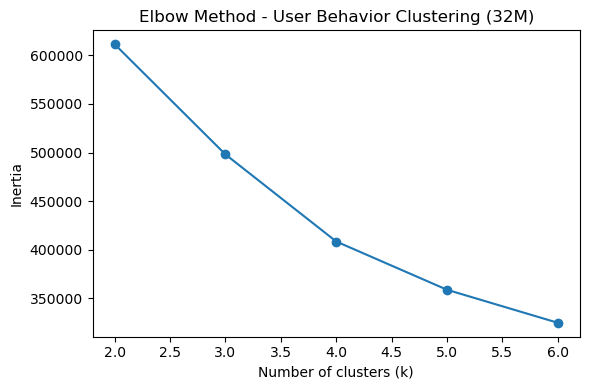

In [9]:
inertias = []
K = range(2, 7)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertias, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method - User Behavior Clustering (32M)")
plt.tight_layout()
plt.show()


In [10]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled)

cluster_summary = df.groupby("cluster")[cols].mean().round(2)
cluster_summary

,avg_rating,stddev_rating,n_ratings,n_genres_rated
cluster,,,,
0,3.36,1.17,69.81,15.54
1,4.04,0.74,70.08,15.61
2,3.53,0.89,406.68,18.56


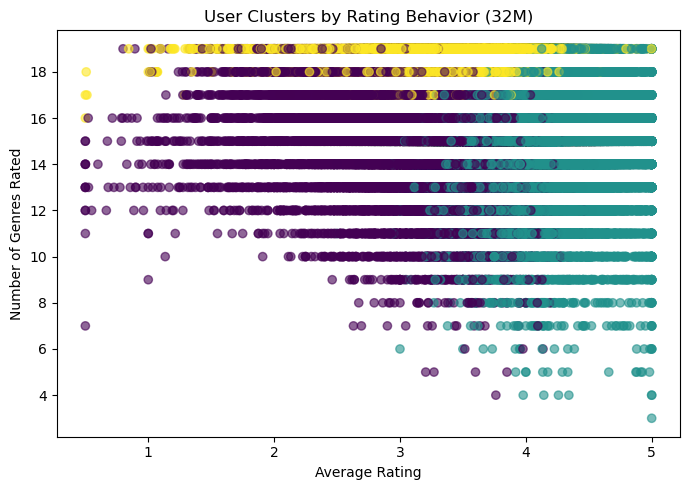

In [11]:
plt.figure(figsize=(7,5))
plt.scatter(
    df["avg_rating"], 
    df["n_genres_rated"], 
    c=df["cluster"], 
    cmap="viridis",
    alpha=0.6
)
plt.xlabel("Average Rating")
plt.ylabel("Number of Genres Rated")
plt.title("User Clusters by Rating Behavior (32M)")
plt.tight_layout()
plt.show()


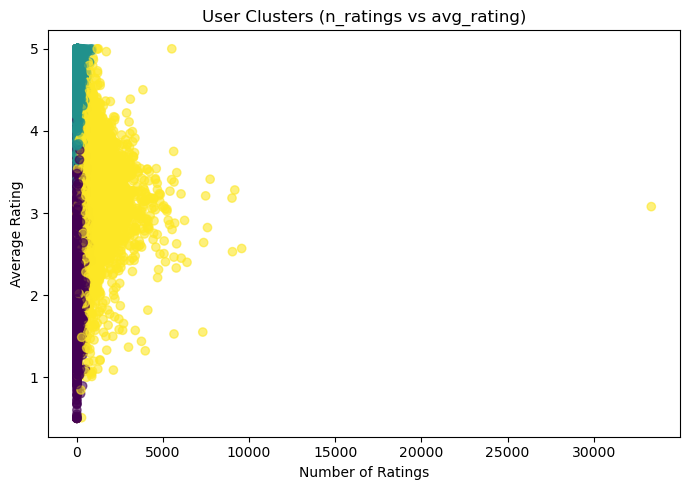

In [12]:
plt.figure(figsize=(7,5))
plt.scatter(
    df["n_ratings"], 
    df["avg_rating"], 
    c=df["cluster"], 
    cmap="viridis",
    alpha=0.6
)
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating")
plt.title("User Clusters (n_ratings vs avg_rating)")
plt.tight_layout()
plt.show()


Para identificar padrões distintos de comportamento entre os utilizadores, realizámos uma análise de clustering baseada nas suas características agregadas de avaliação. A metodologia seguiu os seguintes passos:

1. Extração das features no AWS Athena

Utilizando o dataset de 32 milhões de ratings, calculámos para cada utilizador:

avg_rating — média das avaliações

stddev_rating — variabilidade (consistência) das avaliações

n_ratings — número total de filmes avaliados

n_genres_rated — diversidade de géneros consumidos

Estas métricas foram geradas diretamente em Athena através de uma tabela derivada (user_features), armazenada no S3 em formato Parquet.

2. Pré-processamento em ambiente local (Python + VS Code)

O ficheiro user_features foi carregado no ambiente local, onde:

Removemos valores nulos e garantimos consistência dos dados

Normalizámos todas as features com StandardScaler, para prevenir que escalas diferentes influenciassem o modelo

3. Seleção do número ideal de clusters (Elbow Method)

Aplicámos o Elbow Method testando entre 2 e 6 clusters.
A análise da curva de inércia mostrou um “cotovelo” claro em k=3, indicando que três clusters maximizam o equilíbrio entre simplicidade e separação dos grupos.

4. Aplicação do KMeans

Treinámos um modelo KMeans(k=3) para segmentar os utilizadores.
O modelo atribuiu cada utilizador a um dos três clusters, gerando grupos com diferentes perfis de comportamento.

5. Visualização e interpretação

Foram criados gráficos como:

scatterplots (ex.: avg_rating vs n_genres_rated)

gráficos comparativos baseados nas médias de cada cluster

Estes permitiram identificar três perfis predominantes:
generalistas equilibrados, generous specialists e harsh specialists.

A análise de clustering permitiu segmentar os utilizadores do MovieLens 32M em três grupos distintos, baseados no seu comportamento de avaliação:

Cluster 0 — Generalistas equilibrados

Média de rating ≈ 3.5

Variabilidade moderada

Maior número de ratings (≈ 224)

Maior diversidade de géneros vistos (≈ 14)

Representam o “utilizador médio” mas com muita atividade e diversidade.
Têm comportamento equilibrado e são os melhores para treinar modelos de recomendação.

Cluster 1 — Generous Specialists

Média de rating ≈ 3.87 (a mais alta)

Variabilidade baixa (avaliam de forma consistente)

Menos ratings (~53)

Poucos géneros (~8)

Tendem a avaliar apenas filmes de que gostam → notas altas.
Perfil “selectivo positivo”.

Cluster 2 — Harsh Specialists

Média de rating ≈ 3.28 (a mais baixa)

Alta variabilidade

Poucos ratings (~53)

Poucos géneros (~8)

Mais críticos, seletivos e imprevisíveis.
Podem introduzir ruído em recomendações se não forem normalizados.

Conclusão da Pergunta 7

O clustering revelou três padrões claros de comportamento entre os utilizadores:

um grupo numeroso de utilizadores generalistas e equilibrados,

um grupo mais reduzido mas consistente de utilizadores generosos e seletivos,

e um grupo menor de utilizadores mais críticos e com preferências estreitas.

Estes perfis ajudam a compreender diferenças individuais na forma como as pessoas avaliam filmes e são valiosos para ajustar modelos de recomendação (por exemplo, normalizar ratings por cluster ou aplicar diferentes pesos).